# Quick Start - MNIST

## Install and import TensorFlow (2.15.0)

In [3]:
! pip install tensorflow==2.15.0

In [4]:
import tensorflow as tf

2024-02-12 17:22:10.126970: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-12 17:22:10.128382: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 17:22:10.147671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 17:22:10.147700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 17:22:10.148300: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Load MNIST dataset

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255., X_test / 255.

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualize some digits

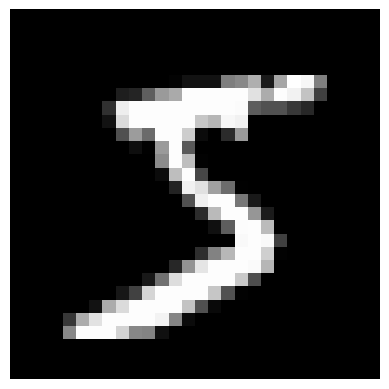

In [8]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

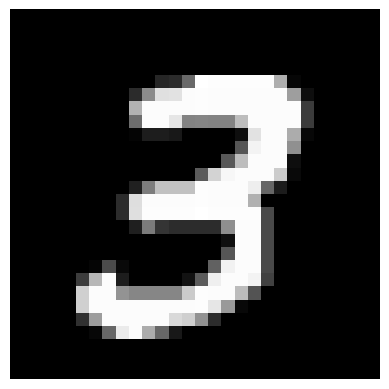

In [9]:
plt.imshow(X_train[7], cmap='gray')
plt.axis('off')
plt.show()

## Build and compile the model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> **Note:** It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 'sparse_categorical_crossentropy'
              metrics=['accuracy'])

## Train and evaluate

In [12]:
r = model.fit(X_train, y_train, 
              epochs=10, 
              validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.2905 - accuracy: 0.9160 - val_loss: 0.1423 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 1s 712us/step - loss: 0.1420 - accuracy: 0.9571 - val_loss: 0.1042 - val_accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.1077 - accuracy: 0.9672 - val_loss: 0.0802 - val_accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 1s 732us/step - loss: 0.0882 - accuracy: 0.9724 - val_loss: 0.0801 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.0761 - accuracy: 0.9761 - val_loss: 0.0768 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.0667 - accuracy: 0.9789 - val_loss: 0.0727 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 1s 703us/step - loss: 0.0578 - accuracy: 0.9811 - val_loss: 0.0665 -

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 565us/step - loss: 0.0673 - accuracy: 0.9800


[0.06734448671340942, 0.9800000190734863]

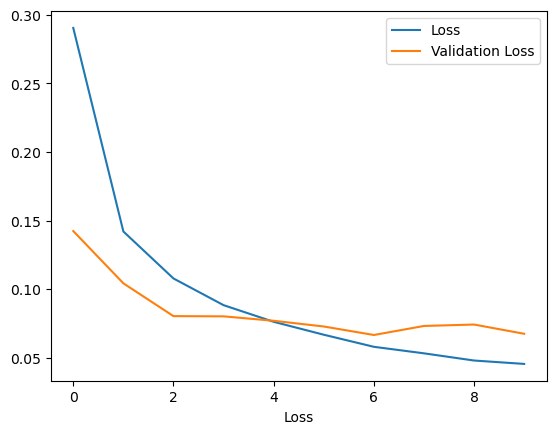

In [14]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.xlabel('Loss')

plt.legend()

plt.show()

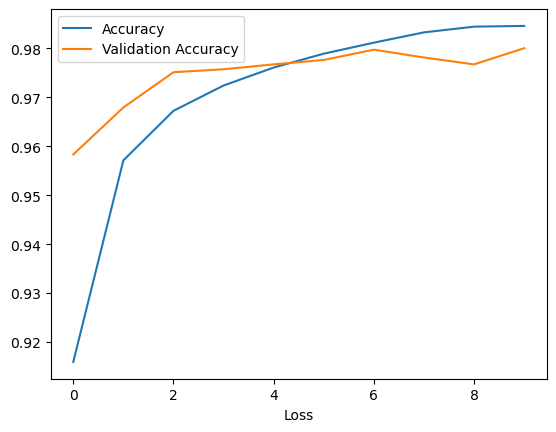

In [15]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.xlabel('Loss')

plt.legend()

plt.show()